    
# ECON320-3 Assignment 2: James (Minkyu) Song 


In [1]:
# Script name: james_song_assignment_02.ipynb
# Purpose of script: Assignment 2 of ECON320 with Dr.O'Connell
# Author: James (Minkyu) Song
# Date Created: September 4th 2022
# --------------------------
# Notes: NA
# ---------------------------

In [5]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid", {"grid.linecolor": "white", "grid.linestyle": ":"})
plt.style.use('dark_background')

## Part I

* Objective: Introduction to the Simple Regression model and derivation from a research question to a Simple Regression Model.*

* Reference: Wooldridge (7th edition), Chapter 2, Section 1*

Perform a data generating process of $$y = \beta_0 + \beta_1 * x +  u$$ where $\beta_0$ is the sum of the 3rd and 4th digits of your birthday, $\beta_1$ is the sum of the 1st and second digits of your birthday, $x$ is the distributed normal with mean of 10 and variance of the first non-zero digit of your birthday, and u is (independently) distributed normal with mean 0 and variance of the last non-zero digit of your birthday.

Perform this process for a "population" of 1 million observations.

In [6]:
birthday = "04021998"
rngen = np.random.RandomState(int(birthday))

In [7]:
# function that finds the variance using my birthday,
# note that "scale" parameter in rng.normal is standard deviation
# so we have to square root the result to use it in rng.normal, since I return the Variance.
def birthday_str_variance(birthday_string):
    for b in list(birthday):
        if b != "0":
            var_x= int(b)**2
            break
    for revb in reversed(list(birthday)):
        if revb != "0":
            var_u = int(revb)**2
            break
    return var_x, var_u

def generate_srm_birhtday(birthday_string, rng):
    #beta0 is addition of 3rd and 4th digit of my birthday
    beta0 = int(birthday_string[2]) +int(birthday_string[3])
    #beta1 is addition of 1st and 2nd digit of my birthday
    beta1= int(birthday_string[0]) + int(birthday_string[1])
    #set scale, scale should be std, so sqrt the result
    var_x, var_u = birthday_str_variance(birthday_string)
    scale_x = math.sqrt(var_x)
    scale_u = math.sqrt(var_u)
    x = rng.normal(loc = 10, scale= scale_x, size = 1000000)
    u = rng.normal(loc = 0, scale= scale_u, size = 1000000)
    y= beta0+ beta1*x+u
    gdata = {"x": x, "u":u, "y":y}
    df = pd.DataFrame(data= gdata)
    return df

In [8]:
df = generate_srm_birhtday(birthday, rngen)
df.head()

,x,u,y
0,11.910290,-1.682645,47.958514
1,8.730048,3.257188,40.177380
2,13.377813,0.651550,56.162803
3,12.423893,3.731421,55.426993
4,12.478994,-7.713969,44.202006


In [9]:
df.describe()

,x,u,y
count,1000000.000000,1000000.000000,1000000.000000
mean,10.006035,0.010581,42.034719
std,3.998586,7.994646,17.876214
min,-9.133104,-39.317959,-39.456987
25%,7.299433,-5.375490,29.962688
50%,10.010361,0.024383,42.054156
75%,12.700835,5.404700,54.119068
max,28.420761,39.050382,124.684891


## Part II

* Objective: Warm up and perform the calculation step-by-step based on the formula for sample var/cov; do not use the buit-in fuctions in NumPy or Python.

Suppose that you observe the following sample with the values of random variables X and Y given in the cells. 

Observation | X | Y |
----------|-----|----------
1 | 1 | 5
2 | 2 | 7
3 | 3 | 8
4 | 4 | 8
5 | 5 | 10
6 | 6 | 12
7 | 7 | 11
8 | 8 | 15
9 | 9 | 19 
10| 10 | 18


Suppose you have a different sample (not necessarily measuring the same things) of random variables J and K:

Observation | J | K 
----------|-----|----------
1 | 7 | 18
2 | 7 | 16
3 | 7 | 15
4 | 8 | 16
5 | 8 | 10
6 | 7 | 11
7 | 8 | 11
8 | 8 | 9
9 | 7 | 11 
10| 6 | 19
11| 9 | 8
12| 9 | 8
13| 8 | 6
14| 9 | 4
15| 7 | 9
16| 8 | 10
17| 9 | 7
18| 6 | 15
19| 10 | 10
20| 10 | 7
21| 9 | 5

In [10]:
# setting up the data
# x: 1 through 10
partII_x = np.array(list(range(1, 11)))
# y: manual entry
partII_y = np.array([5, 7, 8, 8, 10, 12, 11, 15, 19, 18])
# j: manual entry
partII_j = np.array([7, 7, 7, 8, 8, 7, 8, 8, 7, 6, 9, 9, 8, 9, 7, 8, 9, 6, 10, 10, 9])
# k: manual entry
partII_k = np.array(
    [18, 16, 15, 16, 10, 11, 11, 9, 11, 19, 8, 8, 6, 4, 9, 10, 7, 16, 10, 7, 5]
)


Complete questions below, showing all calculations (where applicable).

Upon visual inspection, which random variable looks like it would have a greater variance: X or J? Why?

Show step-by-step calculations for the following:
________________________________________________________

<strong>a. Find the sample var(X), sample var(Y).</strong>
	
b. Find sample cov(X,Y).
	
<strong>c. Find the sample var(J), sample var(K).</strong>
	
d. Find sample cov(J,K).

In [11]:
def sample_variance(np_arr):
    # calculating the parameters for the variance function
    mean_val = np_arr.mean()
    sqd = (np_arr - mean_val) ** 2
    # len(np_arr) = n
    variance = sqd.sum() / len(np_arr)

    # verifiyiing with np.var for accuracy
    if np.var(np_arr) != variance:
        raise ValueError(
            f"the calculated variance ({variance}) is different from numpy variance ({np.var(np_arr)})"
        )
    return variance

______________________
a. Find the sample var(X), sample var(Y).
	
<strong>b. Find sample cov(X,Y).</strong>
	
c. Find the sample var(J), sample var(K).
	
<strong>d. Find sample cov(J,K).</strong>

In [9]:
def sample_covariance(np_arr_1, np_arr_2):
    # basic check of manual data entry process
    # first condition is two arrays must be same length, (Xi,Yi) pairs
    if len(np_arr_1) != len(np_arr_2):
        raise ValueError("Two arrays must be the same length")
    # calculating the parameters for the covariance function
    md_1 = np_arr_1 - np_arr_1.mean()
    md_2 = np_arr_2 - np_arr_2.mean()
    m_1x2 = md_1 * md_2
    # len(np_arr_1)-1 = n-1
    covariance = m_1x2.sum() / (len(np_arr_1) - 1)
    # verifiyiing with np.cov for accuracy
    if np.cov(np_arr_1, np_arr_2)[0, 1] != covariance:
        raise ValueError(
            (
                f"the calculated variance ({covariance}) is different from numpy variance ({np.cov(np_arr_1, np_arr_2)[0,1]})"
            )
        )
    return covariance

a. Find the sample var(X), sample var(Y).

In [10]:
sample_var_x = sample_variance(partII_x)
sample_var_y= sample_variance(partII_y)

print("sample variance of X and Y")
print(f"var(X): {sample_var_x}")
print(f"var(Y): {sample_var_y}")


sample variance of X and Y
var(X): 8.25
var(Y): 20.01


b. Find sample cov(X,Y).

In [11]:
sample_cov_x_y= sample_covariance(partII_x, partII_y)
print("sample variance of X and Y")
print(f"covar(X,Y): {sample_cov_x_y}")

sample variance of X and Y
covar(X,Y): 13.722222222222221


c. Find the sample var(J), sample var(K).

In [12]:
sample_var_j = sample_variance(partII_j)
sample_var_k= sample_variance(partII_k)

print("sample variance of j and k")
print(f"var(J): {sample_var_j}")
print(f"var(K): {sample_var_k}")

sample variance of j and k
var(J): 1.2834467120181405
var(K): 17.80045351473923


d. Find sample cov(J,K).

In [13]:
sample_cov_j_k= sample_covariance(partII_j, partII_k)
print("sample variance of J and K")
print(f"covar(J,K): {sample_cov_j_k}")

sample variance of J and K
covar(J,K): -3.661904761904762


____________
Present scatterplots of {X,Y} and {J,K}. Y and K should be on the vertical axes. Do not place any trend lines. Be sure to label axes.

The Scatterplott of X & Y is visualized below: 


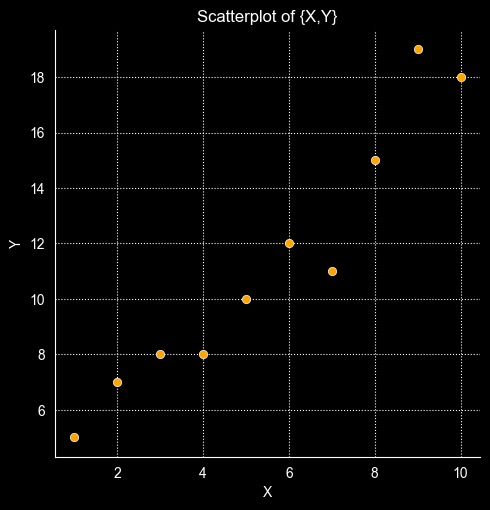

In [14]:
# visualization
# scatterplot of {X,Y}
sns.relplot(
    data=pd.DataFrame(list(zip(partII_x, partII_y)), columns=["X", "Y"]),
    x="X",
    y="Y",
    kind="scatter",
    color="orange",
)
print("The Scatterplott of X & Y is visualized below: ")
plt.title("Scatterplot of {X,Y}")
plt.show()


The Scatterplott of J & K is visualized below: 


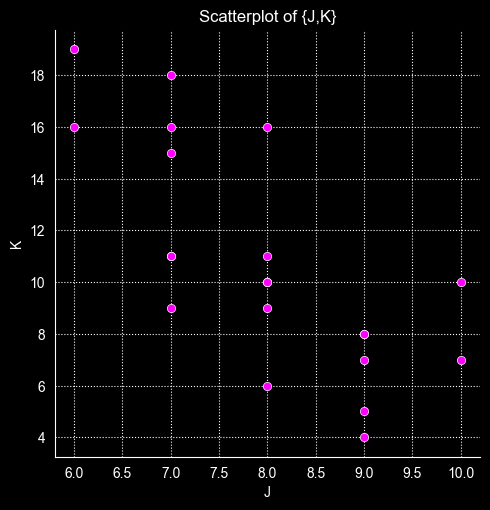

In [15]:
# visualization
# scatterplot of {J,K}
sns.relplot(
    data=pd.DataFrame(list(zip(partII_j, partII_k)), columns=["J", "K"]),
    x="J",
    y="K",
    kind="scatter",
    color="magenta",
)
print("The Scatterplott of J & K is visualized below: ")
plt.title("Scatterplot of {J,K}")
plt.show()


In [16]:
# completed by: James (Minkyu) Song
# Student ID: 2235723